## Veri Madeciniği 13. hafta dersi
## NLP örnek: SMS mesajlarının spam / "spam değil" olarak sınıflandırılması


In [1]:
import pandas as pd

In [2]:
#sms = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/SMSSpamCollection.txt', sep='\t', names=['etiket','mesaj'])
sms = pd.read_csv('data/SMSSpamCollection.txt', sep='\t', names=['etiket','mesaj'])

In [3]:
sms.head()

,etiket,mesaj
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.describe()

,etiket,mesaj
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
sms['etiket'].value_counts()

ham     4825
spam     747
Name: etiket, dtype: int64

In [11]:
# feature engineering (özellik arama ve yenisi oluşturma -gerekirse-)
# mesaj karakter sayısı işe yarar yeni bir özellik olabilir.
sms['kacKarakter'] = sms["mesaj"].apply(len)

In [12]:
sms.head()

,etiket,mesaj,kacKarakter
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# Veri görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<AxesSubplot: ylabel='Frequency'>

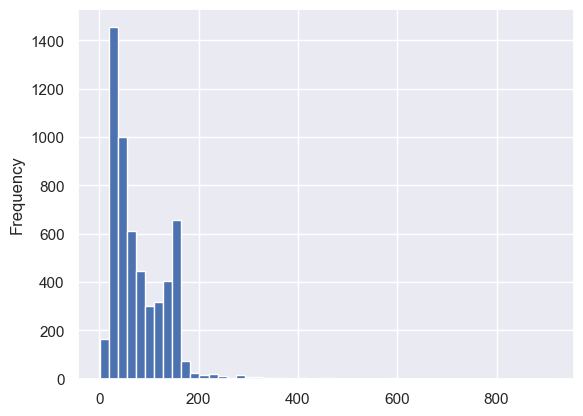

In [14]:
sms['kacKarakter'].plot(bins=50, kind='hist')

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

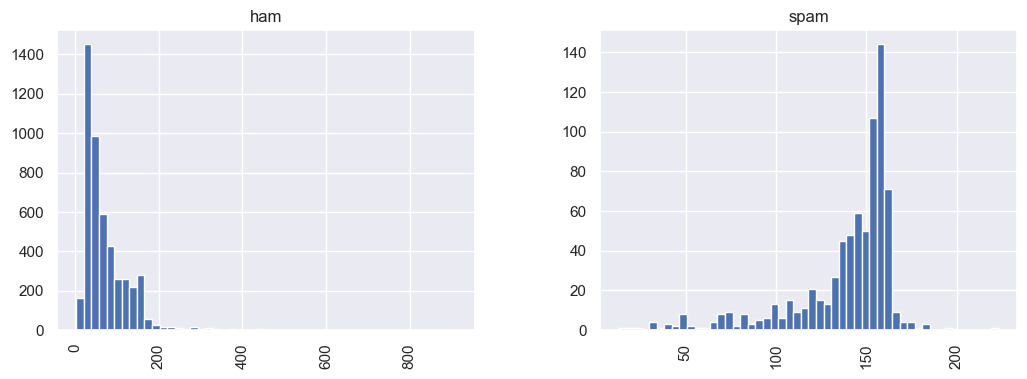

In [15]:
# Spam ve Spam olmayan olan mesajların ayrı ayrı histogram grafiği
sms.hist(column='kacKarakter', by='etiket', bins=50, figsize=(12,4))

In [16]:
sms[sms['etiket']=='spam']['kacKarakter'].describe() # Spam olan mesajların karakter sayıları

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: kacKarakter, dtype: float64

In [17]:
sms[sms['etiket']=='ham']['kacKarakter'].describe() # Spam olmayan mesajların karakter sayıları

count    4825.000000
mean       71.482902
std        58.442635
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: kacKarakter, dtype: float64

In [18]:
import string

In [19]:
cumle = "selam, kaç tane? bilmiyorum. nasıl yani!"
noktalamaIsaretleri = [char for char in cumle if char in string.punctuation]
print(noktalamaIsaretleri)

[',', '?', '.', '!']


In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
"".join([char for char in cumle if char not in string.punctuation]) 

'selam kaç tane bilmiyorum nasıl yani'

In [27]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
def metin_isle(mesaj):
    # noktalama işaretleri gitsin
    # stopwords gitsin
    kelimeler = [char for char in mesaj if char not in string.punctuation]
    kelimeler = ''.join(kelimeler)
    return [kelime for kelime in kelimeler.split() if kelime.lower() not in stopwords.words('english')]

In [32]:
metin_isle("Good morning? How are you today")

['Good', 'morning', 'today']

In [35]:
sms['mesaj'].head(5).apply(metin_isle).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: mesaj, dtype: object

In [34]:
sms['mesaj'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: mesaj, dtype: object

In [36]:
# Vectorization
# 1. Bir mesajda her kelimenin kaç defa kullanıldığını say (kelime frekansı)
# 2. Kullanım sayılarının ağırlığını belirle (Yüksek frekans -> yüksek ağırlık, düşük frekans -> düşük ağırlık)
# 3. Vektör uzunluklarını birim uzunluğa normalize et (orjinal metin uzunluğundan çıkarmak için)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transormer = CountVectorizer(analyzer=metin_isle).fit(sms['mesaj'])

In [39]:
print(len(bow_transormer.vocabulary_))

11425


In [40]:
bow_transormer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [41]:
mesajOrnek = sms['mesaj'][4]
print(mesajOrnek)

Nah I don't think he goes to usf, he lives around here though


In [42]:
bowOrnek = bow_transormer.transform([mesajOrnek])
print(bowOrnek)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [46]:
bow_transormer.get_feature_names_out()[6123]

'dont'

In [48]:
# transform
mesajlar_bow = bow_transormer.transform(sms["mesaj"])
print('Matris boyutu: ', mesajlar_bow.shape)

Matris boyutu:  (5572, 11425)


In [49]:
print('Sıfır olmayan matris elemanı sayısı: ',mesajlar_bow.nnz)

Sıfır olmayan matris elemanı sayısı:  50548


In [50]:
# 1. adım (kelime sayma) tamamlandı.
# Sonraki 2. ve 3. adımları için TfidfTransformer kullanılacak. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transformer = TfidfTransformer().fit(mesajlar_bow)

In [53]:
tfidfOrnek = tfidf_transformer.transform(bowOrnek)
print(tfidfOrnek)

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [55]:
bow_transormer.get_feature_names_out()[10450]

'though'

In [58]:
tfidf_transformer.idf_[bow_transormer.vocabulary_['though']]

6.367592249548054

In [59]:
mesaj_tfidf = tfidf_transformer.transform(mesajlar_bow)

In [60]:
# EDA tamamlandı
# Sonraki aşama model eğitimi

In [61]:
# Naive Bayes sınıflandırıcını kullanacağız.
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(mesaj_tfidf, sms['etiket'])

In [64]:
type(mesaj_tfidf)

scipy.sparse._csr.csr_matrix

In [65]:
print('tahmin edilen:', spam_model.predict(tfidfOrnek)[0])
print('Gerçek:', sms.etiket[4])

tahmin edilen: ham
Gerçek: ham


In [66]:
# Modelin değerlendirilmesi
butun_tahminler = spam_model.predict(mesaj_tfidf)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(sms['etiket'], butun_tahminler))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [79]:
# Eğitim - Test setlerinin ayrılması
from sklearn.model_selection import train_test_split

sms_train, sms_test, label_train, label_test = train_test_split(sms['mesaj'], sms['etiket'], test_size=0.2)

In [70]:
# Pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline

In [80]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=metin_isle)), # 1. adım, bag-of-word oluştur
    ('tfidf', TfidfTransformer()), # bag-of-words -> TF-IDF skorları
    ('classifier', MultinomialNB()), # train (eğitim)
])

In [81]:
pipeline.fit(sms_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function metin_isle at 0x0000011B88B94160>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [82]:
tahminler = pipeline.predict(sms_test)

In [83]:
print(classification_report(label_test, tahminler))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       964
        spam       1.00      0.78      0.88       151

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

